In [818]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [819]:
df = pd.read_csv("/home/logan/Projects/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv") 
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


EDA and Data Cleaning

In [820]:
#checking null data
df['Data_Value'].isnull().sum() 

df = df.dropna(subset= ['Data_Value'])
print(df['Sample_Size'].isnull().sum())

0


In [821]:
print('Datasources,', df['Datasource'].unique()) 
print('Classes', df['Class'].unique()) 
print('Questions ', df['Question'].nunique(), df['Question'].unique()) 
print('# of Locations ', df['LocationAbbr'].nunique())  
print('Topiic', df['Topic'].unique()) 
print("                            ")
print(df.dtypes)


Datasources, ['Behavioral Risk Factor Surveillance System']
Classes ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Questions  9 ['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent 

In [822]:
df_subset = df[['YearStart','LocationAbbr','Class','Question','Data_Value','Age(years)','Education','Gender','Income','Race/Ethnicity','Sample_Size','Total','LocationID']] 
df_subset_no_totals = df_subset[df_subset['Total'] != 'Total']  
df_subset.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 48346 entries, 0 to 53386
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       48346 non-null  int64  
 1   LocationAbbr    48346 non-null  object 
 2   Class           48346 non-null  object 
 3   Question        48346 non-null  object 
 4   Data_Value      48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Gender          3814 non-null   object 
 8   Income          13349 non-null  object 
 9   Race/Ethnicity  10210 non-null  object 
 10  Sample_Size     48346 non-null  float64
 11  Total           1907 non-null   object 
 12  LocationID      48346 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 5.2+ MB


In [823]:
df_subset.head()

,YearStart,LocationAbbr,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,Sample_Size,Total,LocationID
0,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,NaN,NaN,NaN,7304.0,Total,1
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,2581.0,NaN,1
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,4723.0,NaN,1
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,1153.0,NaN,1
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,2402.0,NaN,1


In [824]:
df_subset.duplicated().sum()

0

In [825]:
#Removing Outliers

def remove_outliers(df, column_name):

    
    # Calculate Q1, Q2 and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_out = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_out 
remove_outliers(df_subset,'Sample_Size')


,YearStart,LocationAbbr,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,Sample_Size,Total,LocationID
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,2581.0,NaN,1
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,4723.0,NaN,1
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,1153.0,NaN,1
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,2402.0,NaN,1
5,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,NaN,Some college or technical school,NaN,NaN,NaN,1925.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,13.3,NaN,NaN,NaN,"$75,000 or greater",NaN,212.0,NaN,78
53383,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,25.3,NaN,NaN,NaN,Data not reported,NaN,137.0,NaN,78
53384,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,18.3,NaN,NaN,NaN,NaN,Non-Hispanic White,154.0,NaN,78
53385,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,24.1,NaN,NaN,NaN,NaN,Non-Hispanic Black,820.0,NaN,78


OverView of the Data

In [826]:
#Creating Data subsets
df_ed = df_subset[['YearStart','LocationID','Class','Question','Data_Value','Education','Sample_Size']].dropna(subset = ['Education']) 

df_sex = df_subset[['YearStart','LocationID','Class','Question','Data_Value','Gender','Sample_Size']].dropna(subset = ['Gender'])

df_income = df_subset[['YearStart','LocationID','Class','Question','Data_Value','Income','Sample_Size']].dropna(subset = ['Income']) 
df_income = df_income[df_income['Income'] != 'Data not reported']

df_age = df_subset[['YearStart','LocationID','Class','Question','Data_Value','Age(years)','Sample_Size']].dropna(subset = ['Age(years)']) 

df_race = df_subset[['YearStart','LocationID','Class','Question','Data_Value','Race/Ethnicity','Sample_Size']].dropna(subset = ['Race/Ethnicity'])

Text(0, 0.5, 'Obesity Percentage')

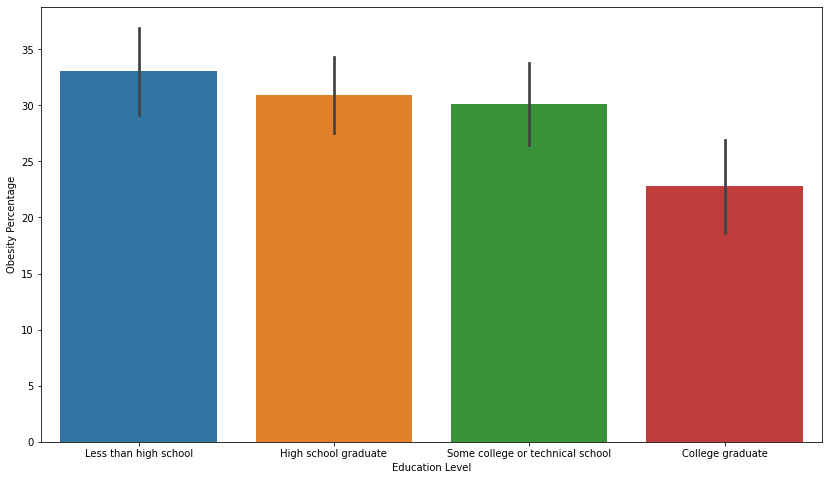

In [827]:
#Obesity Education level
plt.figure(figsize=(14,8)) 
sns.barplot(data = df_ed[df_ed['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Education', y = 'Data_Value', ci = 'sd')
plt.xlabel('Education Level') 
plt.ylabel('Obesity Percentage') 


Text(0, 0.5, 'Obesity Percentage')

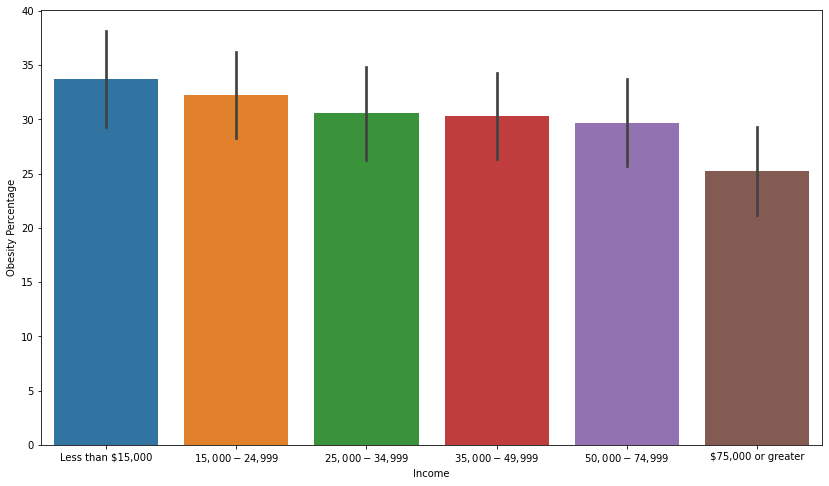

In [828]:
#Obesity Income
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_income[df_income['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Income', y = 'Data_Value', ci = 'sd')
plt.xlabel('Income') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

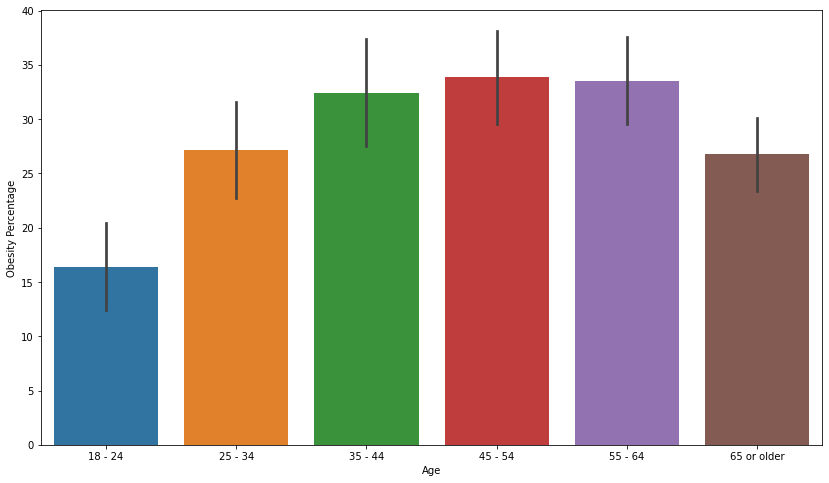

In [829]:
#Obesity Age
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_age[df_age['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Age(years)', y = 'Data_Value', ci = 'sd')
plt.xlabel('Age') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

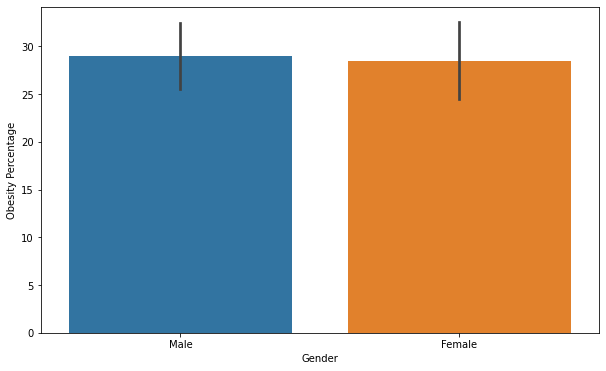

In [830]:
#Obesity Sex
plt.figure(figsize=(10,6)) 
sns.barplot( data = df_sex[df_sex['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Gender', y = 'Data_Value', ci = 'sd')
plt.xlabel('Gender') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

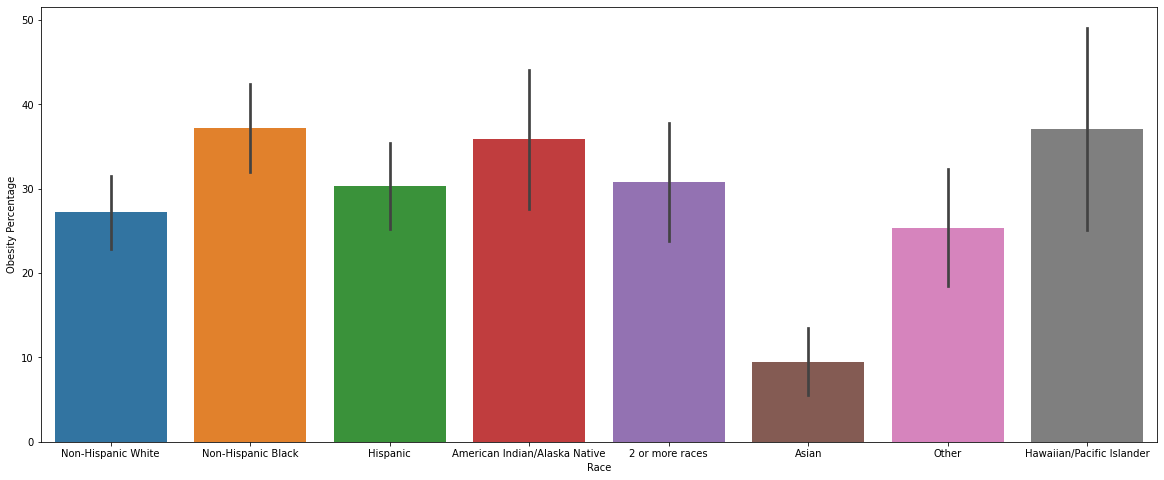

In [831]:
#Obesity Race
plt.figure(figsize=(20,8)) 
sns.barplot( data = df_race[df_race['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Race/Ethnicity', y = 'Data_Value', ci = 'sd')
plt.xlabel('Race') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, '150min Pyhsical Activity')

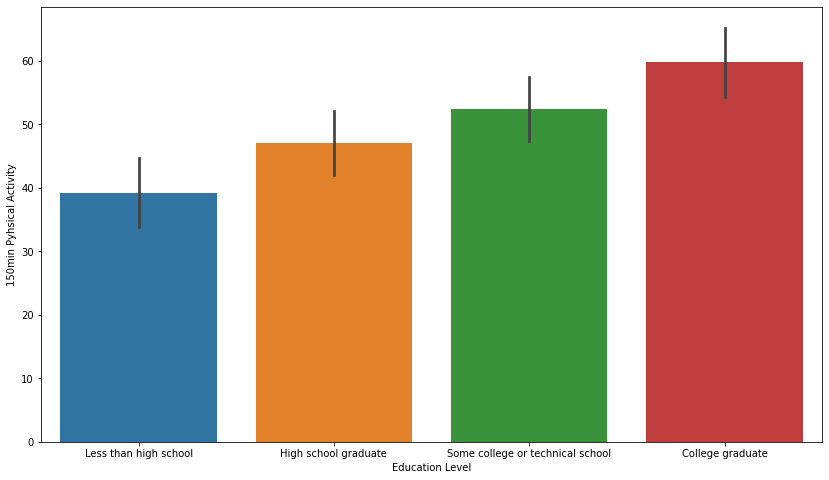

In [832]:
#150min Aerobic Education
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_ed[df_ed['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Education', y = 'Data_Value', ci  = 'sd')
plt.xlabel('Education Level') 
plt.ylabel('150min Pyhsical Activity') 


Text(0, 0.5, '150min Pyhsical Activity')

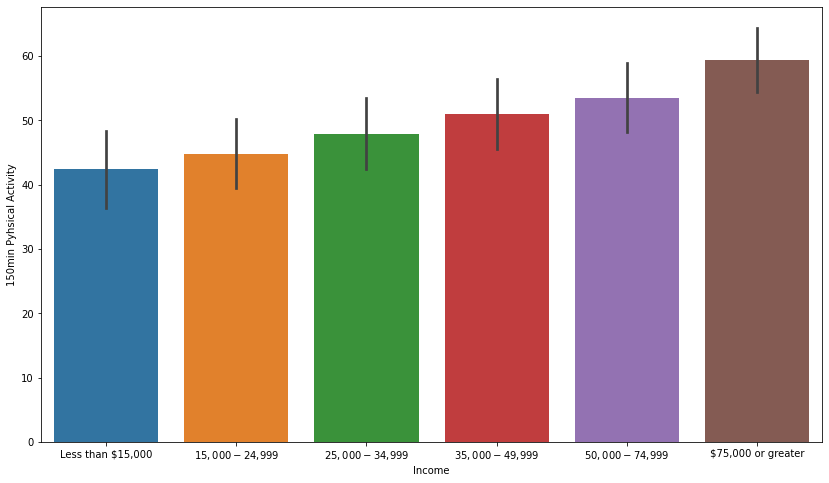

In [833]:
#150min Aerobic Income
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_income[df_income['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Income', y = 'Data_Value', ci = 'sd')
plt.xlabel('Income') 
plt.ylabel('150min Pyhsical Activity') 

Text(0, 0.5, '150min Pyhsical Activity')

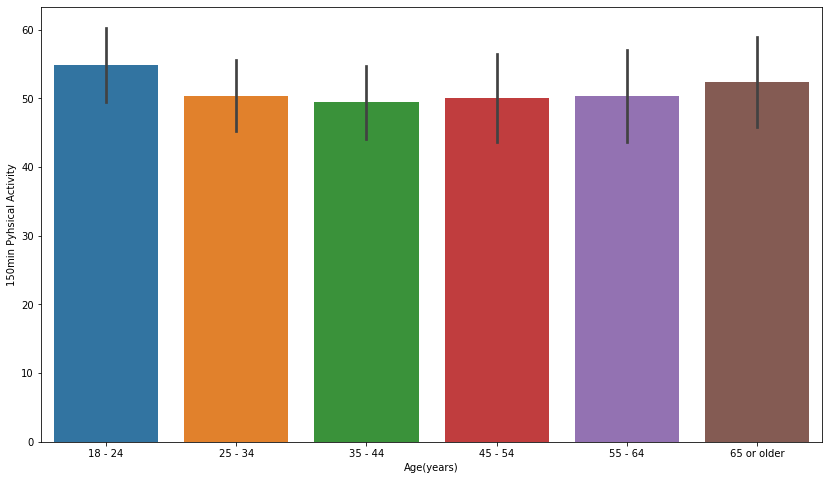

In [834]:
#150min Aerobic Age
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_age[df_age['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Age(years)', y = 'Data_Value', ci = 'sd')
plt.xlabel('Age(years)') 
plt.ylabel('150min Pyhsical Activity') 

Text(0, 0.5, '150min Pyhsical Activity')

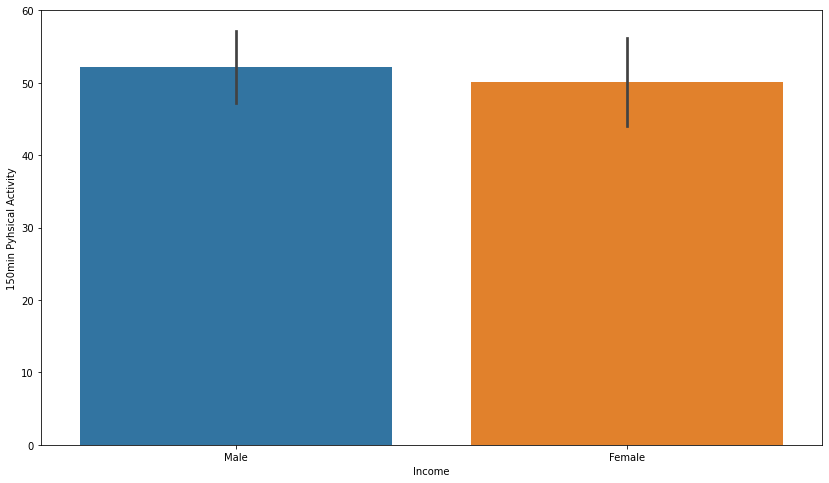

In [835]:
#150min Aerobic Sex
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_sex[df_sex['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Gender', y = 'Data_Value', ci = 'sd')
plt.xlabel('Income') 
plt.ylabel('150min Pyhsical Activity') 

In [836]:
#One Hot encoding data and makind dictionaries for further Analysis

#Questions
df_q = df['Question'].unique() 
questions_dict = {metric: idx for idx, metric in enumerate(df_q)} 
questions_dict_swapped = {v: k for k, v in questions_dict.items()}


#Income 
df_in = df['Income'].unique() 
Income_dict = {metric: idx for idx, metric in enumerate(df_in)} 


df_income['Income'] = df_income['Income'].map(Income_dict) 
df_income['Question'] = df_income['Question'].map(questions_dict)

#Age 
df_ages = df['Age(years)'].unique() 
age_dict = {metric: idx for idx, metric in enumerate(df_ages)} 


df_age['Age(years)'] = df_age['Age(years)'].map(age_dict) 
df_age['Question'] = df_age['Question'].map(questions_dict)

#Education 
df_eds= df['Education'].unique() 
Education_dict = {metric: idx for idx, metric in enumerate(df_eds)} 

df_ed['Education'] = df_ed['Education'].map(Education_dict)
df_ed['Question'] = df_ed['Question'].map(questions_dict) 
 




In [837]:
df_ed.head()

,YearStart,LocationID,Class,Question,Data_Value,Education,Sample_Size
3,2011,1,Obesity / Weight Status,0,33.6,1,1153.0
4,2011,1,Obesity / Weight Status,0,32.8,2,2402.0
5,2011,1,Obesity / Weight Status,0,33.8,3,1925.0
6,2011,1,Obesity / Weight Status,0,26.4,4,1812.0
31,2011,1,Obesity / Weight Status,1,33.2,1,1153.0


In [838]:
questions_dict_swapped

{0: 'Percent of adults aged 18 years and older who have obesity',
 1: 'Percent of adults aged 18 years and older who have an overweight classification',
 2: 'Percent of adults who report consuming fruit less than one time daily',
 3: 'Percent of adults who report consuming vegetables less than one time daily',
 4: 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
 5: 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
 6: 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
 7: 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of

<AxesSubplot:xlabel='YearStart', ylabel='Data_Value'>

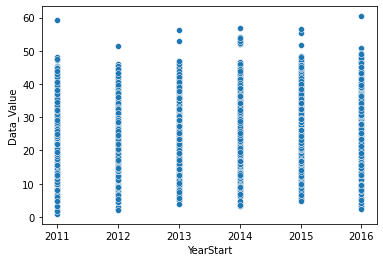

In [839]:
plt.figure() 
sns.scatterplot(data = df_subset[df_subset['Question'] == questions_dict_swapped[0]], x = 'YearStart', y = 'Data_Value')

In [840]:
#Averages per year

obesity_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[0]].groupby('YearStart').mean(numeric_only = True)

Aerobic_150_avg = df_subset[df_subset['Question'] == questions_dict_swapped[5]].groupby('YearStart').mean(numeric_only = True) 
Aerobic_300_avg = df_subset[df_subset['Question'] == questions_dict_swapped[7]].groupby('YearStart').mean(numeric_only = True)
Aerobic_Strenghth_avg = df_subset[df_subset['Question'] == questions_dict_swapped[6]].groupby('YearStart').mean(numeric_only = True) 
leisure_physical_avg = df_subset[df_subset['Question'] == questions_dict_swapped[8]].groupby('YearStart').mean(numeric_only = True) 

veggies_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[3]].groupby('YearStart').mean(numeric_only = True) 
fruit_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[2]].groupby('YearStart').mean(numeric_only = True)  



Text(0, 0.5, 'Obesity Average Percenatge')

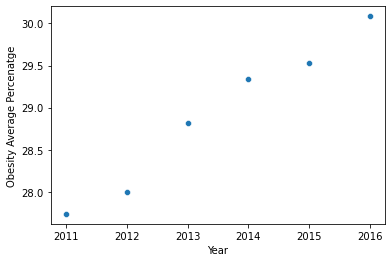

In [841]:
#Obesity vs Year plot 
plt.figure() 
sns.scatterplot(data = obesity_avg_year, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Obesity Average Percenatge')

Obesity has had a steady fairly linear increase in these years

Text(0, 0.5, 'Activity Percenatge')

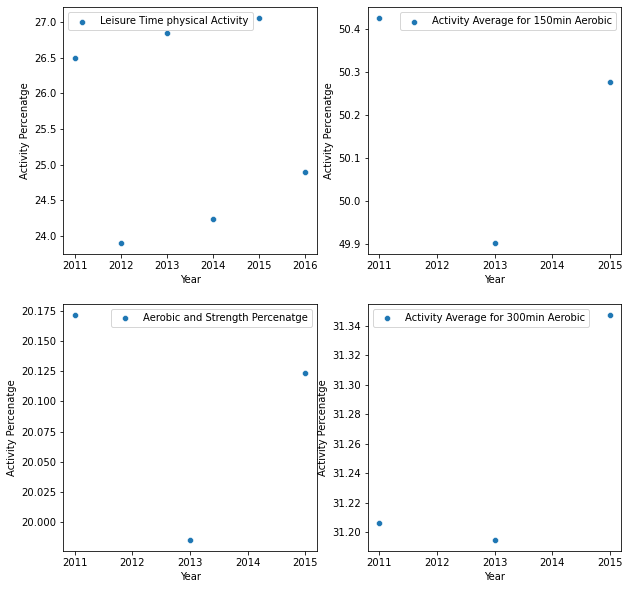

In [842]:
#Grouped Activity plots

fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 

sns.scatterplot(data = leisure_physical_avg, x = 'YearStart', y = 'Data_Value',ax = axes[0,0], label = 'Leisure Time physical Activity') 
axes[0, 0].set_xlabel('Year') 
axes[0,0].set_ylabel('Activity Percenatge') 
sns.scatterplot(data = Aerobic_Strenghth_avg, x = 'YearStart', y = 'Data_Value', ax = axes[1,0], label = 'Aerobic and Strength Percenatge') 
axes[1,0].set_xlabel('Year') 
axes[1,0].set_ylabel('Activity Percenatge')

sns.scatterplot(data = Aerobic_300_avg, x = 'YearStart', y = 'Data_Value', ax = axes[1,1], label = 'Activity Average for 300min Aerobic') 
axes[1,1].set_xlabel('Year') 
axes[1,1].set_ylabel('Activity Percenatge')


sns.scatterplot(data = Aerobic_150_avg, x = 'YearStart', y = 'Data_Value', ax = axes[0,1], label = 'Activity Average for 150min Aerobic') 
axes[0,1].set_xlabel('Year') 
axes[0,1].set_ylabel('Activity Percenatge')



Activity has not changed a notable amount

Text(0, 0.5, 'Percentage')

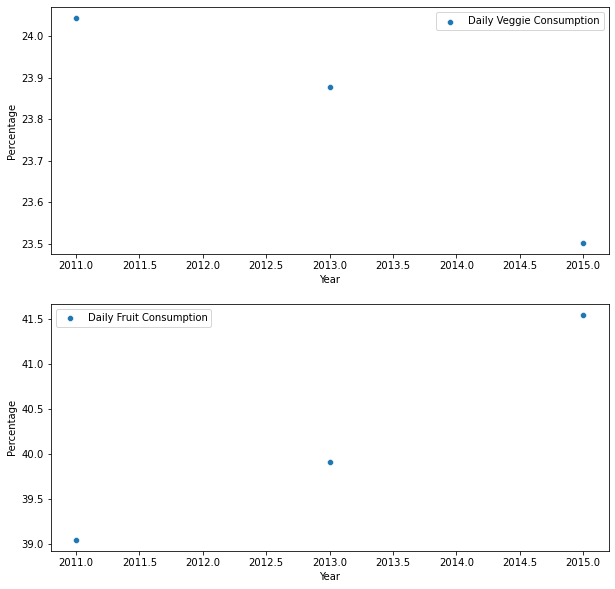

In [843]:
#Veggie and fruit consumption plots

fig, axes = plt.subplots(2, 1, figsize=(10, 10)) 

sns.scatterplot(data = veggies_avg_year, x = 'YearStart', y = 'Data_Value', ax = axes[0],label = 'Daily Veggie Consumption') 
axes[0].set_xlabel('Year') 
axes[0].set_ylabel('Percentage') 

sns.scatterplot(data = fruit_avg_year, x = 'YearStart', y = 'Data_Value', ax = axes[1], label = 'Daily Fruit Consumption') 
axes[1].set_xlabel('Year') 
axes[1].set_ylabel('Percentage') 

 Decrease in daily veggie intake and  increase in daily fruit intake 

In [844]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

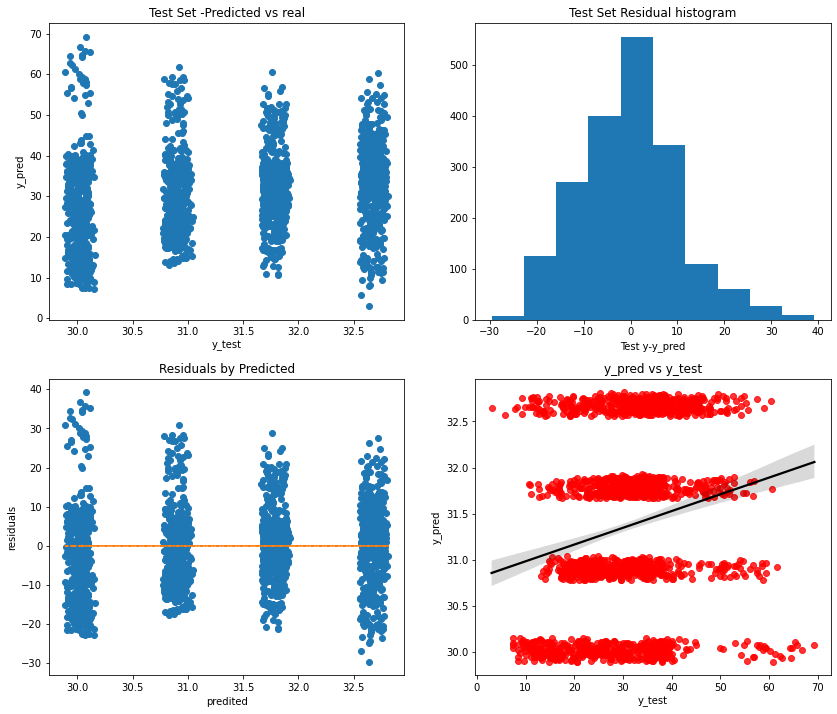

Coefficients: [-0.00136526  0.03698143 -0.88650476]
Intercept: -40.850611171576986
Mean Squared Error: 109.49368530246677
R-squared: 0.02653122643470618
Adjusted R-squared: 0.024996593580951076
                          
                          
Most Important factors Education


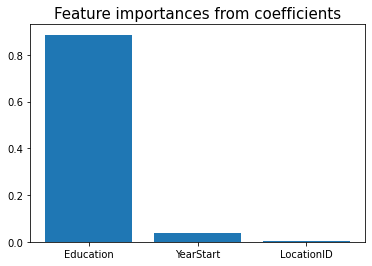

    Attribute  Importance
2   Education    0.886505
1   YearStart    0.036981
0  LocationID    0.001365


In [845]:
#Splitting Data Sets Education

#Education 
df_ed.head() 
X = df_ed[['LocationID','YearStart','Education']]
y = df_ed['Data_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



std_scaler= StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 
y_pred = lin_reg.predict(X_test) 




fig, axes = plt.subplots(2,2,figsize=(14,12))
axes[0,0].plot(y_pred, y_test, 'o')
axes[0,0].set_xlabel("y_test")
axes[0,0].set_ylabel("y_pred")
axes[0,0].set_title("Test Set -Predicted vs real")


axes[0,1].hist(y_test - y_pred)
axes[0,1].set_xlabel("Test y-y_pred")
axes[0,1].set_title("Test Set Residual histogram")

axes[1,0].plot(y_pred,y_test - y_pred,"o")
axes[1,0].set_xlabel("predited")
axes[1,0].set_ylabel("residuals")
axes[1,0].set_title("Residuals by Predicted")
axes[1,0].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

sns.regplot(x = y_test,y= y_pred, scatter_kws={"color": "red"}, line_kws={"color": "black"}, ax = axes[1,1])  
axes[1,1].set_xlabel('y_test')
axes[1,1].set_ylabel('y_pred')
axes[1,1].set_title("y_pred vs y_test") 

plt.show() 

coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}") 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2) 


print('                          ')
print('                          ') 
print('Most Important factors Education') 

importance_ed = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(lin_reg.coef_)
})

importance_ed = importance_ed.sort_values(by = 'Importance', ascending= False)


plt.bar(x=importance_ed['Attribute'], height=importance_ed['Importance'])
plt.title('Feature importances from coefficients', size=15)

plt.show() 
print(importance_ed)




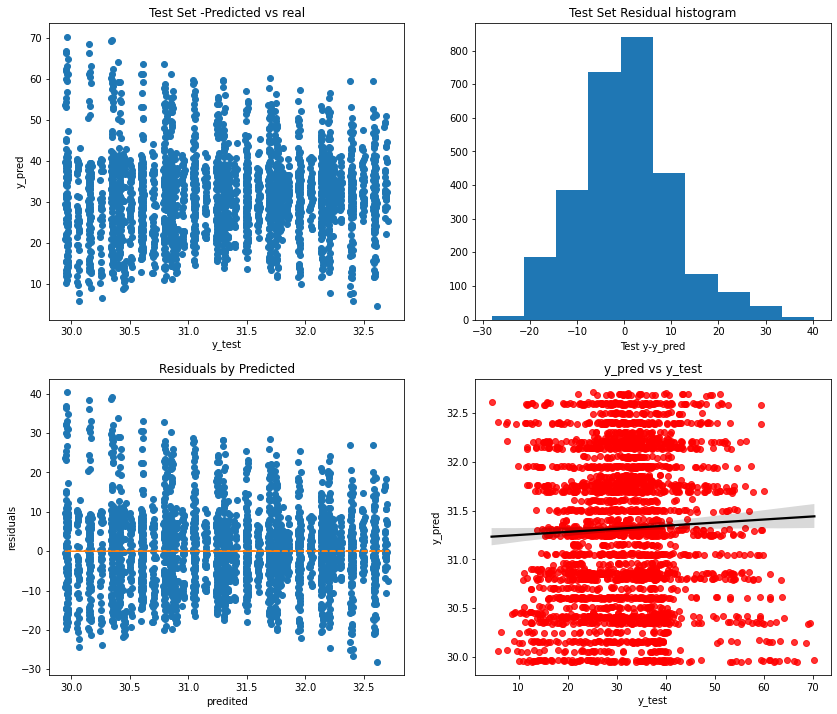

Coefficients: [ 4.24517580e-04  9.73104190e-02 -4.47930775e-01]
Intercept: -163.05336143214043
Mean Squared Error: 101.14728456046177
R-squared: -0.000967805599604743
Adjusted R-squared: -0.002018874348921784
                          
                          
Most Important factors Income


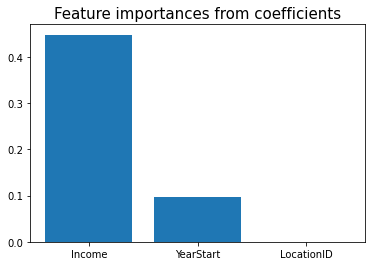

    Attribute  Importance
2      Income    0.447931
1   YearStart    0.097310
0  LocationID    0.000425


In [846]:
#Splitting Data Sets income


df_ed.head() 
X = df_income[['LocationID','YearStart','Income']]
y = df_income['Data_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

std_scaler= StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 
y_pred = lin_reg.predict(X_test) 
y_pred




fig, axes = plt.subplots(2,2,figsize=(14,12))
axes[0,0].plot(y_pred, y_test, 'o')
axes[0,0].set_xlabel("y_test")
axes[0,0].set_ylabel("y_pred")
axes[0,0].set_title("Test Set -Predicted vs real")


axes[0,1].hist(y_test - y_pred)
axes[0,1].set_xlabel("Test y-y_pred")
axes[0,1].set_title("Test Set Residual histogram")

axes[1,0].plot(y_pred,y_test - y_pred,"o")
axes[1,0].set_xlabel("predited")
axes[1,0].set_ylabel("residuals")
axes[1,0].set_title("Residuals by Predicted")
axes[1,0].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

sns.regplot(x = y_test,y= y_pred, scatter_kws={"color": "red"}, line_kws={"color": "black"}, ax = axes[1,1])  
axes[1,1].set_xlabel('y_test')
axes[1,1].set_ylabel('y_pred')
axes[1,1].set_title("y_pred vs y_test") 

plt.show() 

coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}") 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2) 


print('                          ')
print('                          ') 
print('Most Important factors Income') 

importance_in = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(lin_reg.coef_)
})

importance_in = importance_in.sort_values(by = 'Importance', ascending= False)


plt.bar(x=importance_in['Attribute'], height=importance_in['Importance'])
plt.title('Feature importances from coefficients', size=15)

plt.show() 
print(importance_in)



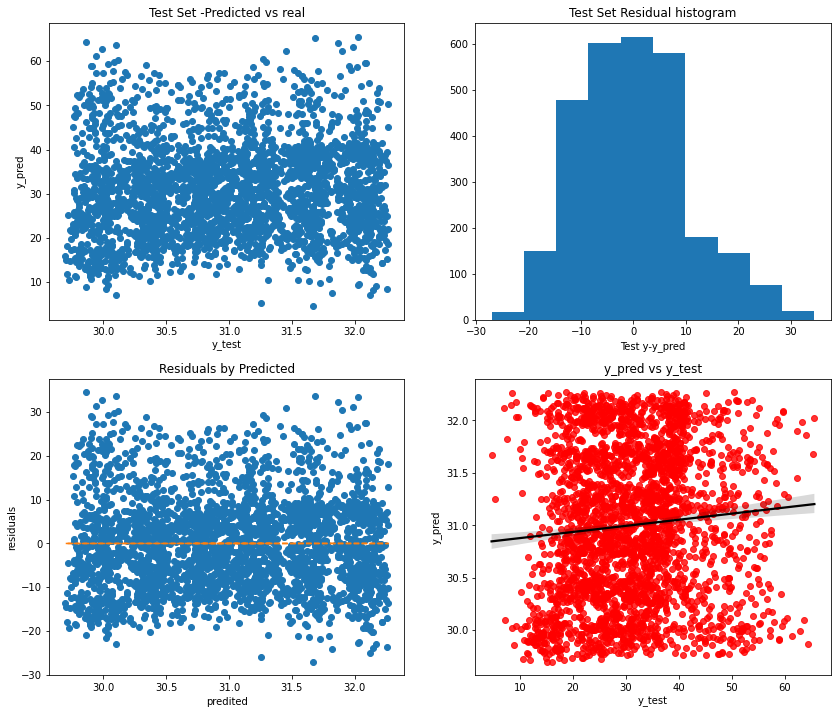

Coefficients: [ 0.00340404 -0.05808928  0.41819902]
Intercept: 146.3854063235946
Mean Squared Error: 108.64544133552084
R-squared: 0.006979491858037923
Adjusted R-squared: 0.005936403088981135
                          
                          
Most Important factors


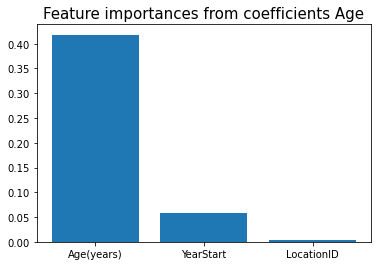

    Attribute  Importance
2  Age(years)    0.418199
1   YearStart    0.058089
0  LocationID    0.003404


In [847]:
#Splitting Data Sets income


df_ed.head() 
X = df_age[['LocationID','YearStart','Age(years)']]
y = df_age['Data_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

std_scaler= StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 
y_pred = lin_reg.predict(X_test) 
y_pred 

fig, axes = plt.subplots(2,2,figsize=(14,12))
axes[0,0].plot(y_pred, y_test, 'o')
axes[0,0].set_xlabel("y_test")
axes[0,0].set_ylabel("y_pred")
axes[0,0].set_title("Test Set -Predicted vs real")


axes[0,1].hist(y_test - y_pred)
axes[0,1].set_xlabel("Test y-y_pred")
axes[0,1].set_title("Test Set Residual histogram")

axes[1,0].plot(y_pred,y_test - y_pred,"o")
axes[1,0].set_xlabel("predited")
axes[1,0].set_ylabel("residuals")
axes[1,0].set_title("Residuals by Predicted")
axes[1,0].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

sns.regplot(x = y_test,y= y_pred, scatter_kws={"color": "red"}, line_kws={"color": "black"}, ax = axes[1,1])  
axes[1,1].set_xlabel('y_test')
axes[1,1].set_ylabel('y_pred')
axes[1,1].set_title("y_pred vs y_test") 
plt.show() 

coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}") 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2) 


print('                          ')
print('                          ') 
print('Most Important factors') 

importance_age = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(lin_reg.coef_)
})

importance_age = importance_age.sort_values(by = 'Importance', ascending= False)


plt.bar(x=importance_age['Attribute'], height=importance_age['Importance'])
plt.title('Feature importances from coefficients Age', size=15)

plt.show() 
print(importance_age)



Text(0.5, 1.0, 'Education')

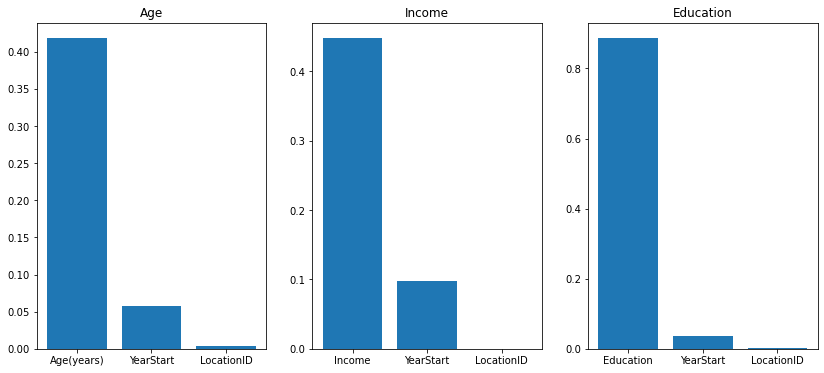

In [848]:
#All feature importance 
fig, axes = plt.subplots(1,3,figsize=(14,6))  
axes[0].bar(x=importance_age['Attribute'], height=importance_age['Importance']) 
axes[0].set_title('Age')
axes[1].bar(x=importance_in['Attribute'], height=importance_in['Importance']) 
axes[1].set_title('Income')
axes[2].bar(x=importance_ed['Attribute'], height=importance_ed['Importance'])
axes[2].set_title('Education') 

Education is the biggest factor in obesity rates and healthy eating